In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import os
import sys
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
col_data = {
    'text' : str,
    'industry' : str, 
}
cols=['text','industry']
df = pd.read_csv('/Users/macbookretina/Desktop/user_classification_clean_data.csv',header= None,dtype=col_data, parse_dates=True, names= list(col_data.keys()),nrows=10000)

In [3]:
df = df.sort_values('industry')
df = df.dropna()

In [4]:
df['in_id'] = df['industry'].factorize()[0]
category_id_df = df[['industry', 'in_id']].drop_duplicates().sort_values('in_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['in_id', 'industry']].values)

In [5]:
df = df[df["in_id"] != 48]

In [6]:
df

,text,industry,in_id
5003,focus medium small business profile style text...,Advertising,0
4532,vivint solar bryan wells luis obispo county mo...,Advertising,0
4521,book invisalign consultation family member fri...,Advertising,0
873,bluesky customer credit application span style...,Advertising,0
4511,referral form billing address cell phone date ...,Advertising,0
...,...,...,...
5944,build tennis community follow read recreation ...,Sports & Activities,10
5934,customer registration form address comment mai...,Sports & Activities,10
5926,bigfoot brighton ride leader info brighton adu...,Sports & Activities,10
5904,usars women player evaluation rate player appl...,Sports & Activities,10


In [7]:
# TEST CASE 
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['industry'], random_state = 0)
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = LinearSVC().fit(X_train_tfidf, y_train)

In [8]:
#testing 
testText = "appointment heritage home work best booking form prequalified agent mail"
print(clf.predict(count_vect.transform([testText])))

['Real Estate & Leasing']


In [11]:
# FIND THE MOST USED UNIGRAMS AND BIGRAMGS
singles = ""
doubles = ""

model=LinearSVC()

# GET THE TERM FREQUENCY AND INVERSE DOCUEMNT FREQUENCY scores of the words all at once
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.text).toarray()
labels = df.in_id

model.fit(features, labels)
N = 2
for industry, in_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[in_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]

  for i in range(2):
      singles = singles + " " + unigrams[i]
      doubles =  doubles + " " + bigrams[i]
  print("# '{}':".format(industry))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Advertising':
  . Top unigrams:
       . campaign
       . kicker
  . Top bigrams:
       . update submit
       . form message
# 'Arts & Design':
  . Top unigrams:
       . artist
       . art
  . Top bigrams:
       . address comment
       . mail people
# 'E-Commerce & Retail Trade':
  . Top unigrams:
       . store
       . showroom
  . Top bigrams:
       . send free
       . upload submit
# 'Education':
  . Top unigrams:
       . student
       . faculty
  . Top bigrams:
       . write letter
       . total hour
# 'Event Organization':
  . Top unigrams:
       . wedding
       . bacon
  . Top bigrams:
       . event product
       . inquiry contact
# 'Finance':
  . Top unigrams:
       . loan
       . firm
  . Top bigrams:
       . credit repair
       . list mail
# 'Health Care and Social Assistance':
  . Top unigrams:
       . patient
       . health
  . Top bigrams:
       . submit question
       . email information
# 'Information Technology':
  . Top unigrams:
       . in

<Figure size 432x288 with 0 Axes>

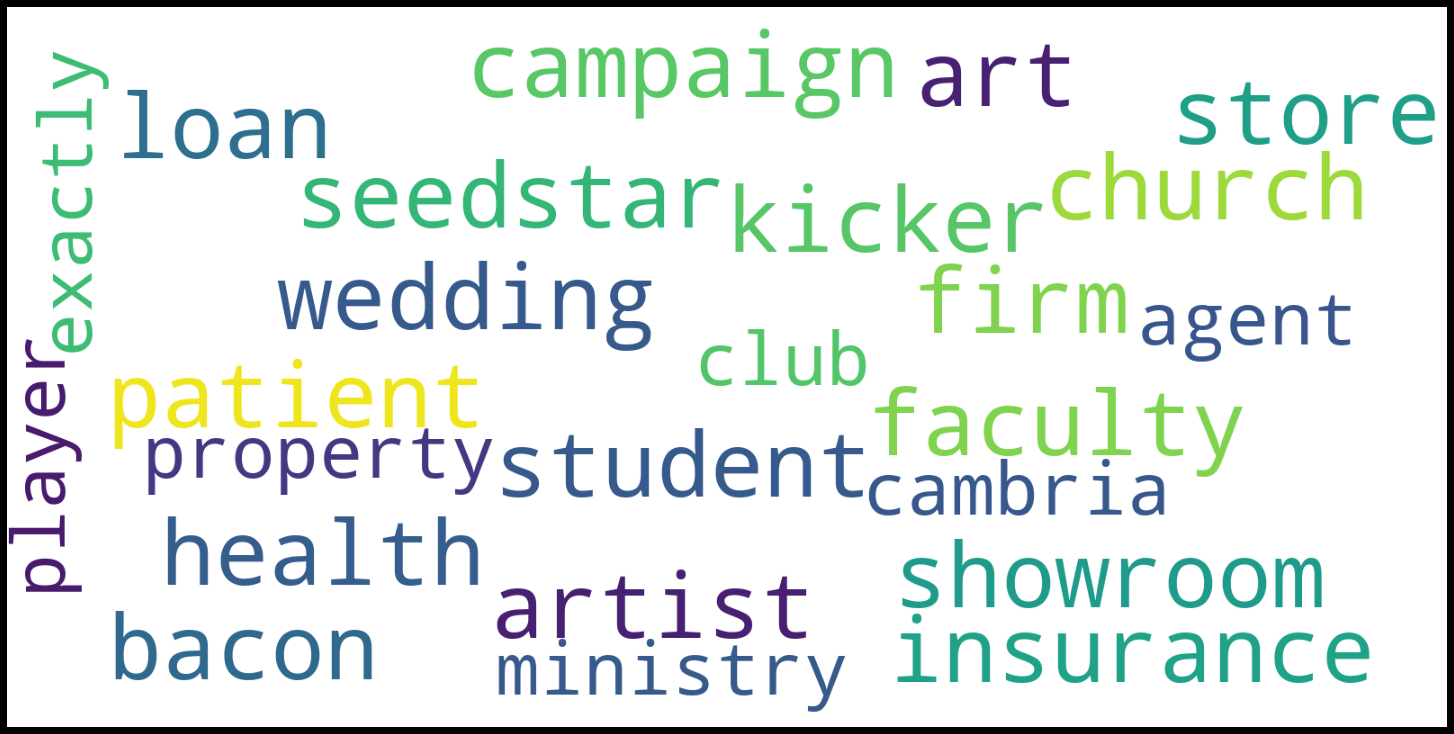

In [12]:
#WORDCLOUD
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# CREATE A WORDCLOUD TO DISPLAY THE WORDS
vectorizer = CountVectorizer(ngram_range=(2,2))
testData = vectorizer.fit_transform(bigrams)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords= STOPWORDS,
                          max_words=100,
                          max_font_size=100,
                          random_state=42,
                          width=1600,
                          height=800).generate(singles)
print(wordcloud)
fig = plt.figure(1)
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [11]:
# classification report
from sklearn import metrics
#clf.predict(count_vect.transform([testText]))
X_test_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_pred = clf.predict(X_test_tfidf)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

/Users/macbookretina/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                      precision    recall  f1-score   support

                       Accommodation       0.75      0.71      0.73      2922
                         Advertising       0.45      0.55      0.50     12306
       Aerospace, Aviation & Defence       0.00      0.00      0.00         2
Agriculture, Farm Animals & Forestry       0.78      0.69      0.74      2210
  Animal Care & Products for Animals       0.81      0.80      0.80      6835
                       Arts & Design       0.55      0.36      0.43      5576
                          Automotive       0.83      0.87      0.85     10468
              Beauty & Personal Care       0.74      0.76      0.75      5863
                        Broadcasting       0.71      0.68      0.69      4653
                        Construction       0.65      0.69      0.67      6013
                          Consulting       0.66      0.58      0.61      6604
                    Consumable Fuels       0.79      0.52      